# Part I - Trip Pattern of Users in the Ford GoBike System
## by Itunu Agbokeye

## Introduction
>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


##### Load all library packages required 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import os

%matplotlib inline
import datetime as dt
from datetime import date

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
Ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
Ford_df.info()
Ford_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


(183412, 16)

In [4]:
Ford_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [5]:
Ford_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
Ford_df.dropna(inplace = True)

In [7]:
Ford_df.shape

(174952, 16)

In [8]:
Ford_df.shape
Ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


##### Change datatype where applicable

In [9]:
Ford_df['start_time'] = pd.to_datetime(Ford_df['start_time'])
Ford_df['end_time'] = pd.to_datetime(Ford_df['end_time'])
Ford_df['start_station_id'] = Ford_df['start_station_id'].astype(str)
Ford_df['end_station_id'] = Ford_df['end_station_id'].astype(str)
Ford_df['bike_id'] = Ford_df['bike_id'].astype(str)
Ford_df['member_birth_year'] = Ford_df['member_birth_year'].round(0)
Ford_df['member_birth_year'] = Ford_df['member_birth_year'].astype(int)

In [10]:
Ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage

##### Convert duration_sec to minutes and hour

In [11]:
Ford_df['duration_min'] = Ford_df['duration_sec']/60
Ford_df['duration_hr'] = Ford_df['duration_sec']/3600
Ford_df['duration_min'] = Ford_df['duration_min'].astype(int)
Ford_df['duration_hr']= Ford_df['duration_hr'].astype(float).round(2)

#### Convert start_time and end_time into year,month, week , day and Hour

In [12]:
Ford_df['start_time_Y'] = Ford_df.start_time.dt.strftime('%Y');
Ford_df['start_time_M'] = Ford_df.start_time.dt.strftime('%B');
Ford_df['start_time_W'] = Ford_df.start_time.dt.strftime('%W');
Ford_df['start_time_D'] = Ford_df.start_time.dt.strftime('%A');
Ford_df['start_time_H'] = Ford_df.start_time.dt.hour
Ford_df['end_time_Y'] = Ford_df.end_time.dt.strftime('%Y');
Ford_df['end_time_M'] = Ford_df.end_time.dt.strftime('%B');
Ford_df['end_time_W'] = Ford_df.end_time.dt.strftime('%W');
Ford_df['end_time_D'] = Ford_df.end_time.dt.strftime('%A');
Ford_df['end_time_H'] = Ford_df.end_time.dt.hour

#### Obtain user age using the current year

In [13]:
current_year = date.today().year
Ford_df = Ford_df.assign(age=lambda x: current_year - x.member_birth_year)
Ford_df.age = Ford_df.age.astype(int)

In [14]:
Ford_df.head(10)

duration_sec              start_time                end_time  \
0          52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2          61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3          36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4           1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5           1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6           1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7           1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8           1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
9           1049 2019-02-28 23:49:47.699 2019-03-01 00:07:17.025   
10           458 2019-02-28 23:57:57.211 2019-03-01 00:05:35.435   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   
6             300.0                              Palm St at Willow St   
7              10.0                        Washington St at Kearny St   
8              10.0                        Washington St at Kearny St   
9              19.0                              Post St at Kearny St   
10            370.0                               Jones St at Post St   

    start_station_latitude  start_station_longitude end_station_id  \
0                37.789625              -122.400811           13.0   
2                37.769305              -122.426826            3.0   
3                37.774836              -122.446546           70.0   
4                37.804562              -122.271738          222.0   
5                37.770407              -122.391198          323.0   
6                37.317298              -121.884995          312.0   
7                37.795393              -122.404770          127.0   
8                37.795393              -122.404770          127.0   
9                37.788975              -122.403452          121.0   
10               37.787327              -122.413278           43.0   

                                     end_station_name  end_station_latitude  \
0                      Commercial St at Montgomery St             37.794231   
2        Powell St BART Station (Market St at 4th St)             37.786375   
3                              Central Ave at Fell St             37.773311   
4                               10th Ave at E 15th St             37.792714   
5                                  Broadway at Kearny             37.798014   
6                            San Jose Diridon Station             37.329732   
7                              Valencia St at 21st St             37.756708   
8                              Valencia St at 21st St             37.756708   
9                                  Mission Playground             37.759210   
10  San Francisco Public Library (Grove St at Hyde...             37.778768   

   ...  start_time_M start_time_W start_time_D  start_time_H end_time_Y  \
0  ...      February           08     Thursday            17       2019   
2  ...      February           08     Thursday            12       2019   
3  ...      February           08     Thursday            17       2019   
4  ...      February           08     Thursday            23       2019   
5  ...      February           08     Thursday            23       2019   
6  ...      February           08     Thursday            23       2019   
7  ...      February           08     Thursday            23       2019   
8  ...      February           08     Thursday            23       2019   
9  ...      February           08     Thursday            23       2019   
10 ...      February           08     Thursday            23

In [15]:
Ford_df.info()
Ford_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 29 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null int64
duration_hr           

(174952, 29)

### What is the structure of your dataset?

The Fordgobike raw dataset contains 183412 rows and 16 columns. However, following the data cleaning process the date set became 174952 distinct rows and 29 features which include:
duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, bike share for all trip, duration min, duration hr, start time Y, start time M, start time W, start time D, end time Y, end time M, end time W, end time D

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are trip period, Usertype, gender, age, Bike share for all trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start time and end time, Member bith year, duration.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest


#### Hourly Trip Distribution

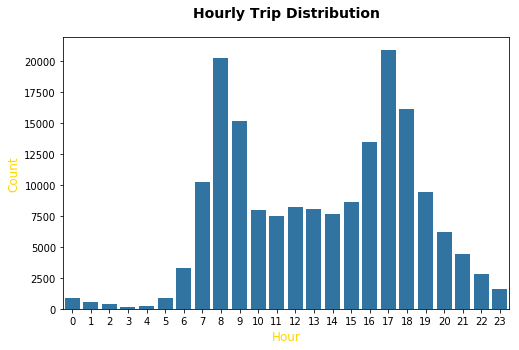

In [16]:
plt.figure(figsize=(8,5))
plt.title("Hourly Trip Distribution", y=1.05, fontsize=14, fontweight ='bold')
sns.countplot(data=Ford_df,x='start_time_H', color=sns.color_palette()[0])
plt.xlabel('Hour', fontsize=12, color = 'gold')
plt.ylabel('Count', fontsize=12, color = 'gold')
plt.show()

The above plot reveals that the peak period for most trips is at the 8th and 17th hour. however, a considerable number of trips are also taken during the 7th, 9th, 16th, and 18th hour. 

#### Daily Trip Distribution

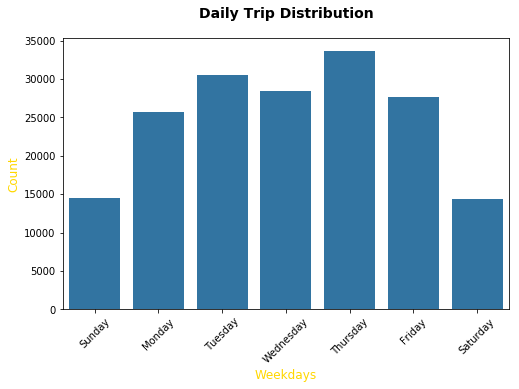

In [17]:
plt.figure(figsize=(8,5))
plt.title("Daily Trip Distribution", y=1.05, fontsize=14, fontweight ='bold')
Weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.countplot(data=Ford_df,x='start_time_D', color=sns.color_palette()[0], order = Weekdays)
plt.xlabel('Weekdays', fontsize=12, color = 'gold')
plt.ylabel('Count', fontsize=12, color = 'gold')
plt.xticks(rotation = 45)
plt.show()

The plot above shows that Thursdays and Tuesdays recorded higher number of dailt trips while Saturday and Sundays recorded lesser trips.

#### Trip Duration Distribution

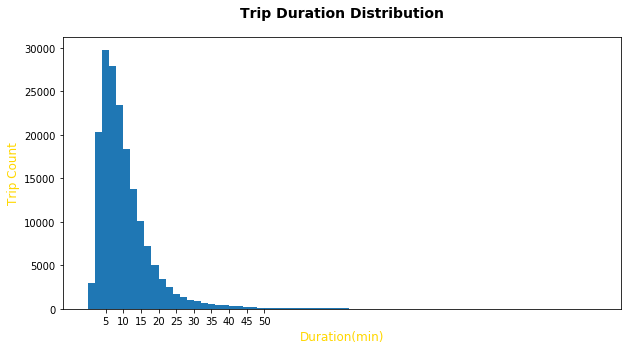

In [18]:
binsize = 2
bins = np.arange(0,Ford_df['age'].max()+binsize, binsize)
plt.figure(figsize=(10,5))
plt.title('Trip Duration Distribution', y=1.05, fontsize=14, fontweight ='bold')
plt.hist(data=Ford_df, x= 'duration_min', bins=bins)
plt.xlabel('Duration(min)', fontsize=12, color = 'gold')
plt.ylabel('Trip Count', fontsize=12, color = 'gold')
plt.xticks([5,10,15,20,25,30,35,40,45,50])
plt.show()

The plot above illustrates that majority of trips last 5 to 10 minutes, However most trip count last for 7 minutes.

#### User Type Distribution

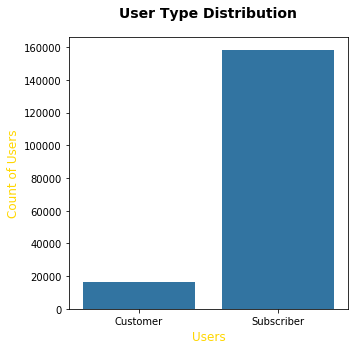

In [19]:
plt.figure(figsize=(5,5))
plt.title("User Type Distribution", y=1.05, fontsize=14, fontweight ='bold')
sns.countplot(data=Ford_df,x='user_type', color=sns.color_palette()[0])
plt.xlabel('Users', fontsize=12, color = 'gold')
plt.ylabel('Count of Users', fontsize=12, color = 'gold')
plt.show()

The plot above shows that the Ford GoBike system is mostly used by subscribers

#### Gender Distribution

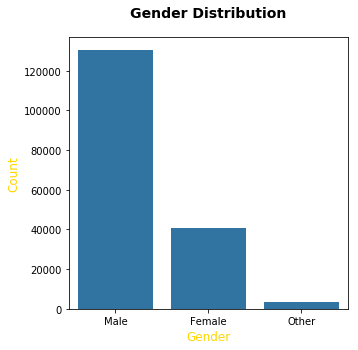

In [20]:
plt.figure(figsize=(5,5))
plt.title("Gender Distribution", y=1.05, fontsize=14, fontweight ='bold')
gender = ['Male', 'Female', 'Other']
sns.countplot(data=Ford_df,x='member_gender', color=sns.color_palette()[0], order = gender)
plt.xlabel('Gender',fontsize=12, color = 'gold')
plt.ylabel('Count',fontsize=12, color = 'gold');

The plot shows that the male gender is the most dominant

#### Age Distribution 

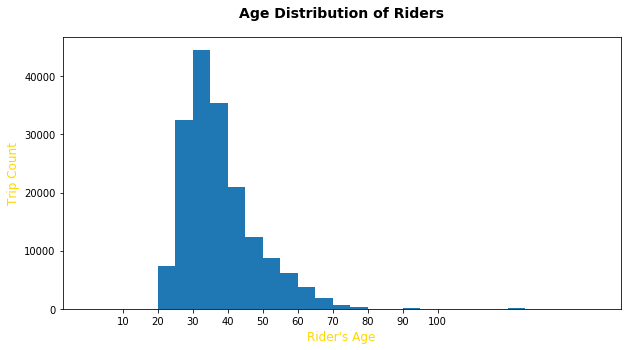

In [21]:
binsize = 5
bins = np.arange(0,Ford_df['age'].max()+binsize, binsize)
plt.figure(figsize=(10,5))
plt.title("Age Distribution of Riders", y=1.05, fontsize=14, fontweight ='bold')
plt.hist(x ='age',data=Ford_df, bins=bins)
plt.xlabel("Rider's Age", fontsize=12, color = 'gold')
plt.ylabel('Trip Count', fontsize=12, color = 'gold')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.show()

The Age distribution shows that 33 years is the dominant age while the mean age is 37 years.

#### Bike Share for all Trips Distribution

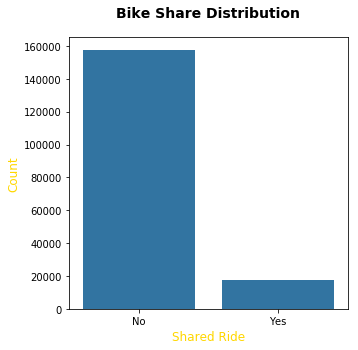

In [22]:
plt.figure(figsize=(5,5))
plt.title("Bike Share Distribution", y=1.05, fontsize=14, fontweight ='bold')
sns.countplot(data=Ford_df,x='bike_share_for_all_trip', color=sns.color_palette()[0])
plt.xlabel('Shared Ride', fontsize=12, color = 'gold')
plt.ylabel('Count', fontsize=12, color = 'gold')
plt.show()

The above distibution shows that most trip were not a shared ride

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The variable of interest used are Usertype, gender, age, Bike share for all trips, trip period(start time and end time). Some transformation was done such as changing data types where apllicable, converting duration_sec to minutes and hour, converting the start_time and end_time to year, month, week, day and hours. This was done to make the analysis seamless
- Under the Hourly trip distribution it is observed that the peak period for most trips is at the 8th and 17th hour. However, a considerable number of trips are also taken during the 7th, 9th, 16th, and 18th hour
- The daily trip distribution shows that Thursdays and Tuesdays recorded higher number of dailt trips while Saturday and Sundays recorded lesser trips.
- The Trip duration distribution illustrates that majority of trips takes 5 to 10 minutes, However most trip count last for 7 minutes.
- User Type distribution, analysis shows that a larger number of users fall into the subscriber category
- The gender distribution depicts that the Ford GoBike system is dominated by male users
- According to the Age distribution the most dominant age is 33 years while the mean age is 37 years.
- The bike share for all trips reveals that the majority of the rides were not shared.




### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no unusual distribution from the features investigated. Data cleaning was carried out to ensure seamless analysis

## Bivariate Exploration
 In this section,I will be investigating relationships between pairs of variables in the Ford GoBike System data.

#### Relationship between user type and age

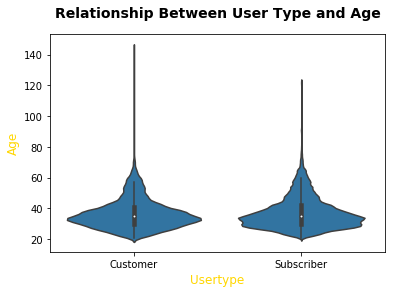

In [23]:
plt.title('Relationship Between User Type and Age', y=1.05, fontsize=14, fontweight ='bold')
sns.violinplot(data=Ford_df,x='user_type',y='age', split=True, height = 10, aspect = 1.4,color=sns.color_palette()[0])
plt.xlabel('Usertype', fontsize=12, color = 'gold')
plt.ylabel('Age', fontsize=12, color = 'gold')
plt.show()


The above plot shows that the median age for both the customer and subscriber is 35.

#### Relationship between gender and riders age

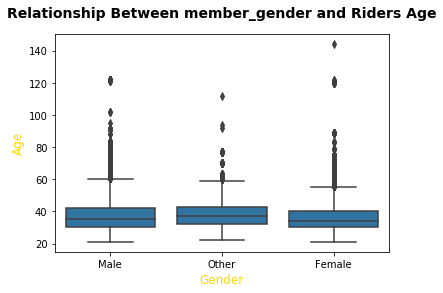

In [24]:
plt.title('Relationship Between member_gender and Riders Age', y=1.05, fontsize=14, fontweight ='bold')
sns.boxplot(data=Ford_df,x='member_gender',y='age', color=sns.color_palette()[0])
plt.xlabel('Gender', fontsize=12, color = 'gold')
plt.ylabel('Age', fontsize=12, color = 'gold')
plt.show()


The above implies that the median age for male riders is 35, while female is 34 and the other category is 37.

#### Relationship between gender and User type

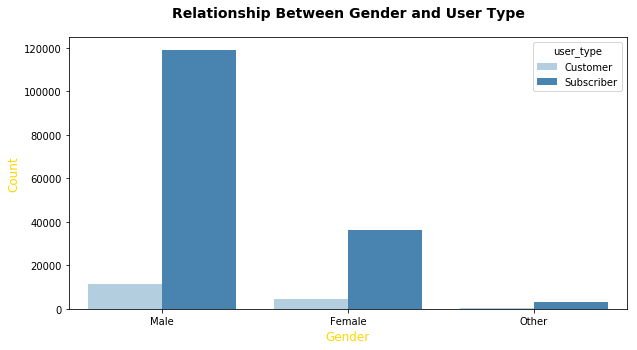

In [25]:
plt.figure(figsize=(10,5))
plt.title('Relationship Between Gender and User Type', y=1.05, fontsize=14, fontweight ='bold')
gender = ['Male', 'Female', 'Other']
sns.countplot(data = Ford_df, x = 'member_gender', hue = 'user_type', palette = 'Blues', order = gender)
plt.xlabel('Gender', fontsize=12, color = 'gold')
plt.ylabel('Count', fontsize=12, color = 'gold')
plt.show()

Plot shows that a larger number of Male subcriber take more trip when compared to other genders.

##### Relationship between Daily Trip and Gender

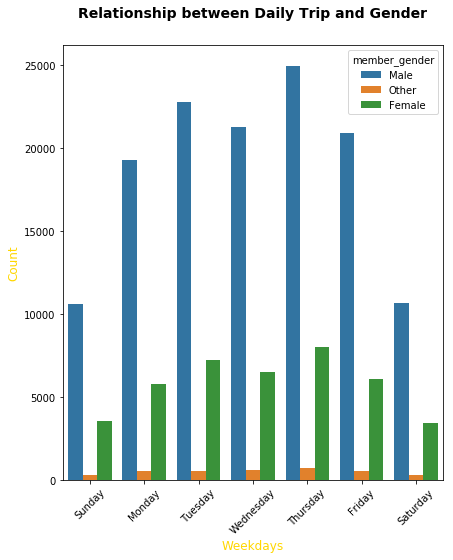

In [26]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Relationship between Daily Trip and Gender", y=1.05, fontsize=14, fontweight ='bold')
Weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.countplot(data=Ford_df,x='start_time_D', hue ='member_gender', order = Weekdays)
plt.xlabel('Weekdays', fontsize=12, color = 'gold')
plt.ylabel('Count', fontsize=12, color = 'gold')
plt.xticks(rotation = 45)
plt.show()

From the above we can also validate that the male gender take more trip each day, however thursday recorded the highest number of trip taken by the three gender

#### Relationship betweenTrip duration and Gender

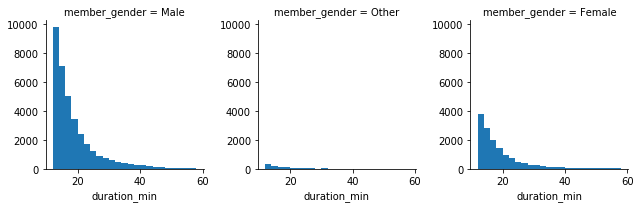

In [27]:
bins = np.arange(12, 58+2, 2)
g = sns.FacetGrid(data = Ford_df, col = 'member_gender')
g.map(plt.hist, 'duration_min', bins=bins);

The above shows that most riders across all genders cycle for 10 mins. The male gender has a lager number.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The male gender take more trip each day, however thursday recorded the highest number of trip taken by the three gender.
- Most riders across all genders cycle for 10 mins. The male gender records a lager number of riders.
- A larger number of Male subcriber take more trip when compared to other genders.
- The median age for male riders is 35, while female is 34 and the other category is 37.
- The median age for both the customer and subscriber is 35

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Relationship between user type and trip period 

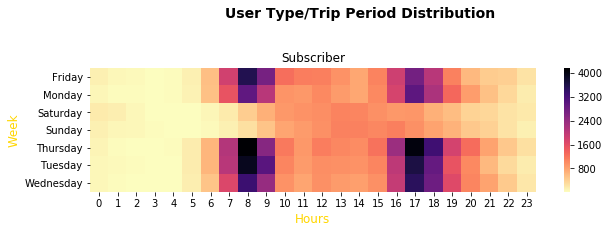

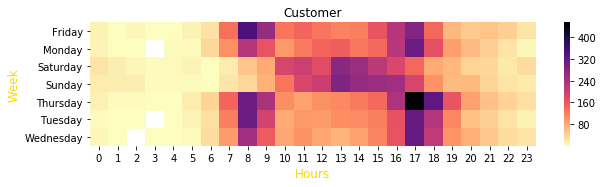

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.suptitle('User Type/Trip Period Distribution', y=1.05, fontsize=14, fontweight ='bold')
subscriber_data = Ford_df.query('user_type == "Subscriber"')
subscriber = subscriber_data.groupby(['start_time_D', 'start_time_H']).size().reset_index(name='count').pivot(index='start_time_D', columns ='start_time_H', values = 'count')
sns.heatmap(subscriber, cmap = 'magma_r')
plt.xlabel('Hours', fontsize=12, color = 'gold')
plt.ylabel('Week', fontsize=12, color = 'gold')
plt.title('Subscriber')


plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
customer_data = Ford_df.query('user_type == "Customer"')
customer = customer_data.groupby(['start_time_D', 'start_time_H']).size().reset_index(name='count').pivot(index='start_time_D', columns ='start_time_H', values = 'count')
sns.heatmap(customer, cmap = 'magma_r')
plt.xlabel('Hours', fontsize=12, color = 'gold')
plt.ylabel('Week', fontsize=12, color = 'gold')
plt.title('Customer')
plt.show()

The plot above shows that the subscriber make very low trips on Saturdays and Sundays, Most trips take place on Monday to Friday and the peak periods were mornings between the hours of 7-9 and evenings between the hours of 16 - 19. For customers, they make trips all the days of the week, however we can deduce that the weekend trips were more significant betweeen the hours of 10 - 15. On Mondays to Fridays trips were significant in the morning at 8 and in the evening at the 17th hour  

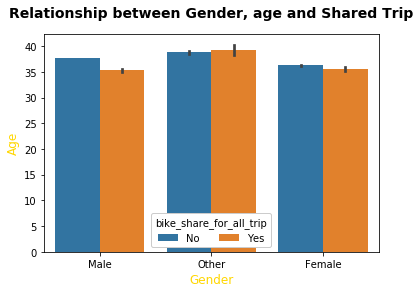

In [40]:
ax = sns.barplot(data = Ford_df, x = 'member_gender', y = 'age', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip')
plt.title("Relationship between Gender, age and Shared Trip", y=1.05, fontsize=14, fontweight ='bold')
plt.xlabel('Gender', fontsize=12, color = 'gold')
plt.ylabel('Age', fontsize=12, color = 'gold')
plt.show()

#### Relationship between Gender, age and User type

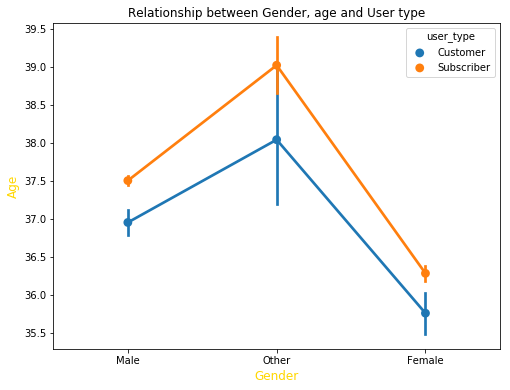

In [49]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = Ford_df, x = 'member_gender', y = 'age', hue = 'user_type')
           #palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Relationship between Gender, age and User type')
plt.xlabel('Gender', fontsize=12, color = 'gold')
plt.ylabel('Age', fontsize=12, color = 'gold')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I was able to deduce that there are more subscribers than customers. Most of the Subscribers take more of work trips from Mondays to Friday because their peak periods are mornings when going to work between the hours of 7-9 and evenings when returning between the hours of 16 - 19. Customers take more of weekend trip due to the day and period.

### Were there any interesting or surprising interactions between features?


## Conclusions
I was able to dive deep into the Ford GoBike system covering the greater San Francisco Bay area. The period at which different trips were made, reasons for trips, the peak periods, the dominating user type, age distribution and gender of the riders. I also looked at the relationsgip between the differnt variables.
